# Mandril with multiple experts, and suboptimal experts

In [1]:
from mab.expertTest import ExpertTest
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
paths = {
    "perfect": "banditk5n10/perfect",
    "rand_from_2_best": "banditk5n10/rand_from_2_best",
    "rand_from_3_best": "banditk5n10/rand_from_3_best",
}

In [3]:
perfect = ExpertTest(paths["perfect"])
rand_from_2_best = ExpertTest(paths["rand_from_2_best"])
rand_from_3_best = ExpertTest(paths["rand_from_3_best"])

In [4]:
def disaply_task(logs, ind):
    print("tasks:")
    display(logs["tasks"][ind])
    print("Training:")
    print("  actions")
    display(logs["train_actions"][ind])
    print("  returns")
    display(logs["train_returns"][ind])
    print("Validation:")
    print("  actions")
    display(logs["valid_actions"][ind])
    print("  returns")
    display(logs["valid_returns"][ind])

In [5]:
display(perfect.logs["tasks"].shape)
display(perfect.logs["train_returns"].shape)
display(perfect.logs["valid_returns"].shape)


disaply_task(perfect.logs, 0)
disaply_task(perfect.logs, 1)

(2000,)

(2000, 10)

(2000, 10)

tasks:


{'mean': array([0.80739044, 0.51450007, 0.19111815, 0.18687478, 0.77252164])}

Training:
  actions


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

  returns


array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

Validation:
  actions


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

  returns


array([2., 2., 2., 2., 2., 1., 1., 2., 2., 2.], dtype=float32)

tasks:


{'mean': array([0.05182789, 0.06952621, 0.51517512, 0.68854365, 0.45962809])}

Training:
  actions


array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]], dtype=float32)

  returns


array([1., 1., 1., 1., 0., 0., 0., 1., 1., 1.], dtype=float32)

Validation:
  actions


array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]], dtype=float32)

  returns


array([2., 2., 1., 2., 1., 1., 1., 2., 1., 1.], dtype=float32)

In [6]:
disaply_task(rand_from_2_best.logs, 0)
disaply_task(rand_from_2_best.logs, 1)

tasks:


{'mean': array([0.80739044, 0.51450007, 0.19111815, 0.18687478, 0.77252164])}

Training:
  actions


array([[4., 4., 4., 0., 0., 4., 4., 4., 0., 4.]], dtype=float32)

  returns


array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

Validation:
  actions


array([[4., 4., 0., 4., 0., 4., 0., 4., 0., 0.],
       [4., 0., 0., 4., 4., 0., 0., 0., 4., 4.]], dtype=float32)

  returns


array([2., 2., 2., 2., 2., 1., 1., 2., 2., 2.], dtype=float32)

tasks:


{'mean': array([0.05182789, 0.06952621, 0.51517512, 0.68854365, 0.45962809])}

Training:
  actions


array([[2., 2., 2., 3., 3., 2., 2., 2., 3., 2.]], dtype=float32)

  returns


array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0.], dtype=float32)

Validation:
  actions


array([[2., 2., 3., 2., 3., 2., 3., 2., 3., 3.],
       [2., 3., 3., 2., 2., 3., 3., 3., 2., 2.]], dtype=float32)

  returns


array([1., 1., 1., 2., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [7]:
disaply_task(rand_from_3_best.logs, 0)
disaply_task(rand_from_3_best.logs, 1)

tasks:


{'mean': array([0.80739044, 0.51450007, 0.19111815, 0.18687478, 0.77252164])}

Training:
  actions


array([[0., 1., 0., 1., 1., 0., 1., 0., 4., 1.]], dtype=float32)

  returns


array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)

Validation:
  actions


array([[4., 1., 0., 0., 1., 1., 1., 4., 4., 4.],
       [1., 4., 0., 1., 4., 0., 0., 1., 0., 0.]], dtype=float32)

  returns


array([2., 1., 2., 2., 2., 1., 1., 1., 2., 2.], dtype=float32)

tasks:


{'mean': array([0.05182789, 0.06952621, 0.51517512, 0.68854365, 0.45962809])}

Training:
  actions


array([[3., 4., 3., 4., 4., 3., 4., 3., 2., 4.]], dtype=float32)

  returns


array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1.], dtype=float32)

Validation:
  actions


array([[2., 4., 3., 3., 4., 4., 4., 2., 2., 2.],
       [4., 2., 3., 4., 2., 3., 3., 4., 3., 3.]], dtype=float32)

  returns


array([2., 2., 1., 1., 2., 2., 1., 0., 1., 1.], dtype=float32)

## Average reward for each expert, and for each trainee
We also want to see how many times the trainee chose what arm - according to the best to worst.

In [8]:
def get_mean(returns):
    return returns.mean()

In [9]:
print("Perfect")
display(get_mean(perfect.logs["train_returns"]))
display(get_mean(perfect.logs["valid_returns"]))
print("Random of best 2")
display(get_mean(rand_from_2_best.logs["train_returns"]))
display(get_mean(rand_from_2_best.logs["valid_returns"]))
print("Random of best 3")
display(get_mean(rand_from_3_best.logs["train_returns"]))
display(get_mean(rand_from_3_best.logs["valid_returns"]))

Perfect


0.83115

1.65435

Random of best 2


0.7441

1.49055

Random of best 3


0.66845

1.322

## Display actions by sorted index
Meaning we sort the means from the greatest to the smallest, and then look at the actions taken in relation to these.

In [48]:
perfect.get_sorted()
rand_from_2_best.get_sorted()
rand_from_3_best.get_sorted()

### Histograms of the actions taken
The actions are sorted from best to worst, i.e. 0 is the best actions, and 4 is the worst.

In [71]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

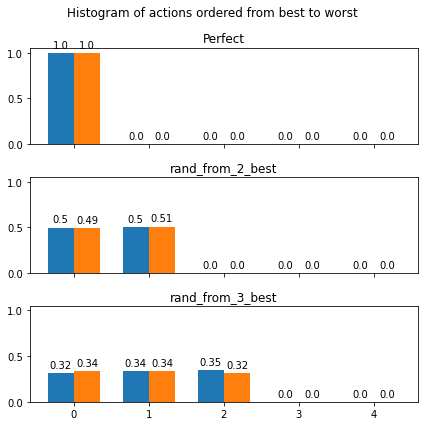

In [73]:
hist0 = np.histogram(perfect.valid_sorted.reshape(-1).numpy(), bins=5, range=[0,5])
hist1 = np.histogram(rand_from_2_best.valid_sorted.reshape(-1).numpy(), bins=5, range=[0,5])
hist2 = np.histogram(rand_from_3_best.valid_sorted.reshape(-1).numpy(), bins=5, range=[0,5])

train0 = np.histogram(perfect.train_sorted.reshape(-1).numpy(), bins=5, range=[0,5])
train1 = np.histogram(rand_from_2_best.train_sorted.reshape(-1).numpy(), bins=5, range=[0,5])
train2 = np.histogram(rand_from_3_best.train_sorted.reshape(-1).numpy(), bins=5, range=[0,5])

width = 0.35

N_valid = len(perfect.valid_sorted.reshape(-1))
N_train = len(perfect.train_sorted.reshape(-1))

fig, axs = plt.subplots(3,1, sharex=True, sharey=True, figsize=(6,6))
r01 = axs[0].bar(np.arange(5) - width / 2, hist0[0] / N_valid, width, label="Validation")
r02 = axs[0].bar(np.arange(5) + width / 2, train0[0] / N_train, width, label="Training")
autolabel(r01, axs[0])
autolabel(r02, axs[0])
axs[0].set_title("Perfect")

r11 = axs[1].bar(np.arange(5) - width / 2, hist1[0] / N_valid, width, label="Validation")
r12 = axs[1].bar(np.arange(5) + width / 2, train1[0] / N_train, width, label="Training")
autolabel(r11, axs[1])
autolabel(r12, axs[1])
axs[1].set_title("rand_from_2_best")

r21 = axs[2].bar(np.arange(5) - width / 2, hist2[0] / N_valid, width, label="Validation")
r22 = axs[2].bar(np.arange(5) + width / 2, train2[0] / N_train, width, label="Training")
autolabel(r21, axs[2])
autolabel(r22, axs[2])
axs[2].set_title("rand_from_3_best")

fig.suptitle("Histogram of actions ordered from best to worst")
fig.tight_layout()
plt.show()

So it looks like the agent learns to replicate the expert in randomly choosing what the expert chooses.

I would be interesting to train it with 100 steps, to see if it does choose the one with more gain more.